<a href="https://colab.research.google.com/github/jorge-flores-py/APRENDIZAJE-AUTOMATICO-1-IAAA1/blob/main/TP4_AA1_regresion_Lineal_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Jorge Flores**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

In [ ]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files

# Subir archivo manualmente
uploaded = files.upload()

# Leer archivo
df = pd.read_excel('Folds5x2_pp.xlsx')

# Mostrar primeras filas
df.head()

Saving Folds5x2_pp.xlsx to Folds5x2_pp.xlsx


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
#cambiamos los nombres de las columnas
df.rename(columns={
    'AT': 'Temperatura_Ambiente',
    'V': 'Vacio_Escape',
    'AP': 'Presion_Atmosferica',
    'RH': 'Humedad_Relativa',
    'PE': 'Potencia_Electrica'
}, inplace=True)

# Verificar cambio
df.head()

,Temperatura_Ambiente,Vacio_Escape,Presion_Atmosferica,Humedad_Relativa,Potencia_Electrica
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [ ]:
df.info() #vemos el datalle del dataset columnas, tipo y si hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperatura_Ambiente  9568 non-null   float64
 1   Vacio_Escape          9568 non-null   float64
 2   Presion_Atmosferica   9568 non-null   float64
 3   Humedad_Relativa      9568 non-null   float64
 4   Potencia_Electrica    9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.describe()

,Temperatura_Ambiente,Vacio_Escape,Presion_Atmosferica,Humedad_Relativa,Potencia_Electrica
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
df.shape

(9568, 5)

## 🎯 Definición de Variable Objetivo y Predictoras

### 🧭 Objetivo general del proyecto

El objetivo es construir un modelo de regresión que permita **predecir la potencia eléctrica generada** por una planta de energía combinada, utilizando variables atmosféricas y de operación como entrada. Esta predicción puede ser útil para la planificación operativa y la eficiencia energética.

---

### 📌 Variable objetivo (*Target*)

- **Potencia Eléctrica (PE)**  
  Representa la salida generada por la planta (en megavatios - MW).  
  Se elige como variable objetivo porque es el **resultado final que se desea predecir** a partir de las condiciones del entorno y funcionamiento de la planta.  

---

### 📥 Variables predictoras (*Features*)

Se seleccionan como variables de entrada al modelo las siguientes:

1. **Temperatura Ambiente (AT)**  
   - Variable climática que afecta directamente la eficiencia térmica de la planta.

2. **Vacío de Escape (V)**  
   - Representa el nivel de presión en el sistema de escape; influye en el rendimiento del ciclo de vapor.

3. **Presión Atmosférica (AP)**  
   - Afecta la densidad del aire y, por lo tanto, la combustión y el rendimiento.

4. **Humedad Relativa (RH)**  
   - Puede impactar el proceso de enfriamiento y la eficiencia en la transferencia de calor.

Estas variables se eligen porque son **medibles en tiempo real** y están relacionadas con el entorno operativo de la planta.

---




In [ ]:
from scipy.stats import gaussian_kde
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
from bokeh.models import Span

output_notebook()

# Lista para guardar los gráficos
plots = []
palette = Category10[10]

# Creamos un gráfico para cada variable numérica
for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        data = df[column].dropna()

        hist, edges = np.histogram(data, bins=20, density=True)
        kde = gaussian_kde(data)
        x_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(x_vals)

        p = figure(title=f"Distribución de {column}", width=300, height=300)
        p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
               fill_color=palette[i % len(palette)], line_color="black", alpha=0.7, legend_label="Histograma")

        p.line(x_vals, kde_vals, line_color="navy", line_width=2, legend_label="KDE")

        # Media
        mean = data.mean()
        mean_line = Span(location=mean, dimension='height', line_color='red', line_dash='dashed', line_width=2)
        p.add_layout(mean_line)

        # Mediana
        median = data.median()
        median_line = Span(location=median, dimension='height', line_color='green', line_dash='solid', line_width=2)
        p.add_layout(median_line)

        p.legend.visible = False
        plots.append(p)

# Mostramos los gráficos en un grid de 4 columnas
grid = gridplot(plots, ncols=5)
show(grid)


### 📈 Análisis de distribuciones por variable (Histograma + KDE + Media/Mediana)

Se generaron gráficos individuales por variable numérica, combinando histogramas normalizados, curvas de densidad KDE, y líneas de referencia para la media (verde) y la mediana (roja). A continuación, se detalla el análisis por variable:

---

#### 🔹 **Temperatura Ambiente (AT)**
- La **distribución es aproximadamente normal**, con una curva KDE simétrica.
- **Media y mediana muy cercanas**, lo que indica baja asimetría.
- No se observan outliers importantes ni multimodalidad.

---

#### 🔹 **Vacío de Escape (V)**
- Distribución más **extendida y dispersa**, con menor concentración de valores centrales.
- La **curva KDE es más plana** y presenta una ligera asimetría.
- Media y mediana están **levemente separadas**, lo que indica cierto sesgo.


---

#### 🔹 **Presión Atmosférica (AP)**
- Presenta una **distribución aproximadamente normal y simétrica**.
- **Media y mediana están prácticamente alineadas**, lo que indica ausencia de sesgo.
---

#### 🔹 **Humedad Relativa (RH)**
- Distribución **más plana y dispersa**, con valores elevados predominantes.
- Hay una **separación visible entre media y mediana**, lo que indica asimetría.
- La curva KDE sugiere **posible multimodalidad o comportamiento no lineal**.
---

#### 🔹 **Potencia Eléctrica (PE)**
- Variable objetivo (*target*), con distribución **relativamente simétrica y suave**.
- Media y mediana bien alineadas, lo que indica baja asimetría..


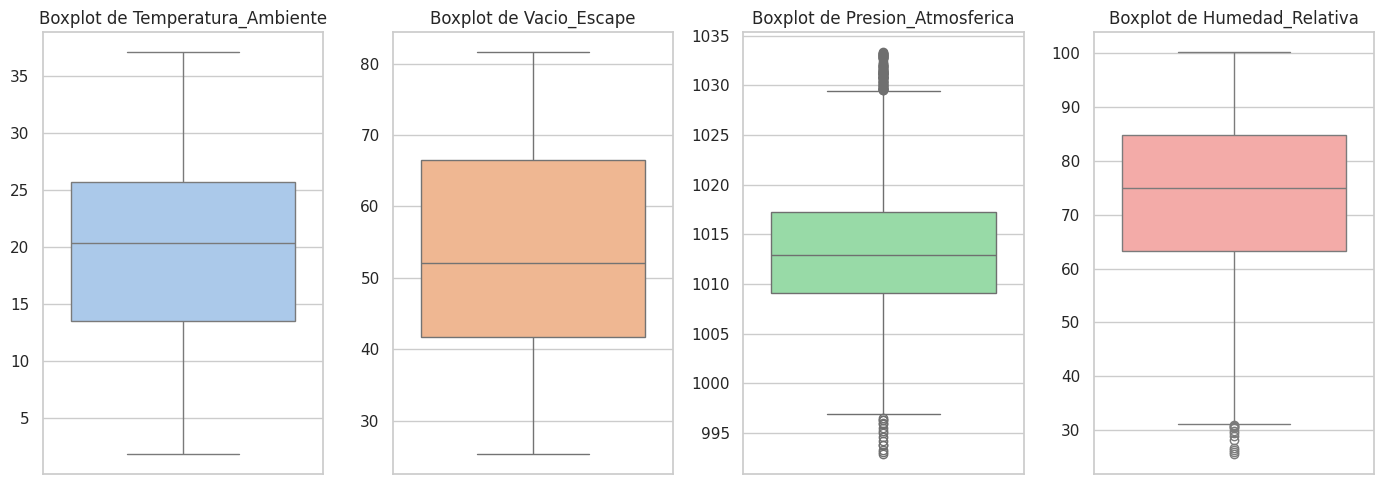

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid")

# Crear figura con subplots
plt.figure(figsize=(14, 5))

# Boxplots para cada variable predictora
for i, columna in enumerate(df.columns[:-1], 1):  # Excluimos el target
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[columna], color=sns.color_palette("pastel")[i-1])
    plt.title(f'Boxplot de {columna}')
    plt.ylabel('')

plt.tight_layout()
plt.show()


### 📦 Análisis de Dispersión y Outliers (Boxplots)

Se utilizaron boxplots para visualizar la dispersión de las variables predictoras y detectar la presencia de valores atípicos:
---

#### 🔹 Temperatura Ambiente (AT)
- La distribución es simétrica y bien centrada.
- No se observan outliers significativos.

#### 🔹 Vacío de Escape (V)
- No presenta outliers visibles.
- Sin embargo, la **mediana está descentrada hacia la parte inferior del rango intercuartílico**, y la parte superior de la caja es más larga.
- Esto sugiere una **asimetría positiva leve**, es decir, mayor dispersión en los valores altos.

#### 🔹 Presión Atmosférica (AP)
- Presenta una distribución centrada, con la **mediana equilibrada** dentro del rango intercuartílico.
- Se identifican múltiples **outliers en ambos extremos**, más visibles en el límite superior.
- La dispersión en los extremos sugiere **variabilidad ocasional en condiciones atmosféricas**.


#### 🔹 Humedad Relativa (RH)
- Presenta una **asimetría leve negativa**, con mayor dispersión en los valores bajos.
- La **mediana está desplazada hacia valores altos**, indicando que la mayoría de los datos tienen alta humedad.
- Se observan **outliers únicamente en el extremo inferior**, por debajo de aproximadamente 35%.




In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import row
from bokeh.palettes import Category10

output_notebook()

# Crear scatterplots con Bokeh actualizado
colors = Category10[4]
scatter_plots = []

for i, columna in enumerate(df.columns[:-1]):  # Excluye el target
    p = figure(title=f"{columna} vs Potencia_Electrica",
               background_fill_color="#fafafa",
               height=400, width=450)

    p.scatter(x=df[columna], y=df['Potencia_Electrica'], size=4, alpha=0.5, color=colors[i])
    p.xaxis.axis_label = columna
    p.yaxis.axis_label = "Potencia_Electrica"

    scatter_plots.append(p)

# Mostrar los gráficos alineados
show(row(*scatter_plots))


### 🔍 Análisis de relaciones lineales preliminares (scatterplots)

Se realizaron gráficos de dispersión entre cada variable independiente (*feature*) y la variable dependiente **Potencia Eléctrica** para identificar relaciones lineales:

- **Temperatura Ambiente vs Potencia Eléctrica**  
  Se observa una **fuerte relación negativa lineal**. A medida que aumenta la temperatura ambiente, la potencia eléctrica generada disminuye. Esto indica una dependencia directa y significativa.

- **Vacío de Escape vs Potencia Eléctrica**  
  Existe una **relación negativa débil pero visible**. Aunque no tan marcada como con la temperatura, los datos muestran una leve tendencia a que, con mayor vacío, disminuye la potencia.

- **Presión Atmosférica vs Potencia Eléctrica**  
  Se detecta una **relación levemente positiva**, aunque con **alta dispersión**. Esto sugiere que el efecto de la presión ambiental en la potencia generada es más complejo o menos determinante.

- **Humedad Relativa vs Potencia Eléctrica**  
  No se aprecia una relación lineal clara. La dispersión es alta, especialmente en valores elevados de humedad, lo que indica que esta variable podría tener un **comportamiento no lineal** o menor impacto.

### ✅ Conclusión preliminar

La variable **Temperatura Ambiente** se perfila como el predictor más fuerte de **Potencia Eléctrica**, seguida por **Vacío de Escape**. Las variables **Presión Atmosférica** y **Humedad Relativa** podrían tener menor influencia o una relación más compleja con el target.



## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar X (features) e y (target)
X = df.drop(columns='Potencia_Electrica') # Features: Temperatura_Ambiente, Vacio_Escape, Presion_Atmosferica, Humedad_Relativa
y = df['Potencia_Electrica'] # target Potencia_Electrica

# División 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler() # creo el objeto para escalar los datos
X_train_scaled = scaler.fit_transform(X_train) # fit: calcula la media y la desviación estándar de cada columna del X_train.
                                               # transform: aplica la transformación (z-score) a esos datos.
X_test_scaled = scaler.transform(X_test) #  Escala el conjunto de test con la misma media y desviación obtenidas del entrenamiento.


## 🧹 Limpieza y Preprocesamiento de Datos

### 1. Valores Faltantes (Missing Values)
- Se verificó que **no existen valores nulos** en ninguna de las columnas del dataset.
- ✔️ No fue necesario eliminar ni imputar valores.

---

### 2. Outliers
- Se identificaron **outliers leves** en algunas variables (`Presion_Atmosferica` y `Humedad_Relativa`) a través de gráficos de boxplot.
- Sin embargo, **no se eliminaron** para conservar la totalidad de los datos y evaluar su impacto en el modelo.

---

### 3. Selección de Features
- No se descartó ninguna variable predictora, ya que todas son relevantes desde el punto de vista físico:
  - `Temperatura_Ambiente`
  - `Vacio_Escape`
  - `Presion_Atmosferica`
  - `Humedad_Relativa`
- ✔️ Se mantuvieron todas las features para el entrenamiento del modelo.

---

### 4. Variables Categóricas
- El dataset no contiene variables categóricas, por lo tanto:
  - ❌ No fue necesario realizar encoding.

---

### 5. Escalado
- Se aplicó `StandardScaler` para normalizar los datos y asegurar que todas las features tengan:
  - media = 0
  - desviación estándar = 1

---

### 6. División de Datos
- El dataset se dividió en:
  - **80% entrenamiento**
  - **20% prueba (test)**
- ✔️ Se utilizó `train_test_split` con `random_state=42`.

---

### ✅ Conclusión
El dataset fue validado, escalado y dividido correctamente sin necesidad de eliminar variables ni registros. El modelo se entrenó con todos los datos disponibles para conservar la mayor cantidad de información posible.





## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# 2. Predicciones en train y test
y_train_pred = modelo.predict(X_train_scaled)
y_test_pred = modelo.predict(X_test_scaled)

# 3. Calcular métricas para entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# 4. Calcular métricas para testeo
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# 5. Mostrar resultados
print("Metricas del modelo de Regresión Lineal:")
print(f" R² (Train): {r2_train:.3f}     | R² (Test): {r2_test:.3f}")
print(f" MSE (Train): {mse_train:.2f}   | MSE (Test): {mse_test:.2f}")
print(f" MAE (Train): {mae_train:.2f}   | MAE (Test): {mae_test:.2f}")


Metricas del modelo de Regresión Lineal:
 R² (Train): 0.928     | R² (Test): 0.930
 MSE (Train): 20.89   | MSE (Test): 20.27
 MAE (Train): 3.63   | MAE (Test): 3.60


## 📈 Conclusiones del Modelo de Regresión Lineal

### 🔹 Evaluación general del modelo

Se entrenó un modelo de regresión lineal utilizando las variables predictoras escaladas, y se evaluó tanto en el conjunto de entrenamiento como en el conjunto de testeo. Las métricas obtenidas fueron:

| Métrica        | Entrenamiento | Testeo |
|----------------|---------------|--------|
| **R²**         | 0.928         | 0.930  |
| **MSE**        | 20.89         | 20.27  |
| **MAE**        | 3.63          | 3.60   |

---

### 📊 Interpretación de las métricas

- **R² (Coeficiente de determinación)**  
  Mide cuánta proporción de la variabilidad de la variable objetivo puede ser explicada por el modelo.  
  - *Valores cercanos a 1 indican un buen ajuste.*  
  - En este caso, **R² ≈ 0.93**, lo cual es excelente. El modelo explica el 93% de la variabilidad en la Potencia Eléctrica.

- **MSE (Error Cuadrático Medio)**  
  Calcula el promedio de los errores al cuadrado. Penaliza con más severidad los errores grandes.  
  - *Cuanto más bajo, mejor.*  
  - Aquí, el **MSE ≈ 20**, lo que indica que los errores grandes son poco frecuentes.

- **MAE (Error Absoluto Medio)**  
  Mide el error promedio en unidades originales (misma escala que el target).  
  - Es **más interpretable** que el MSE.  
  - El modelo se equivoca, en promedio, **en ~3.6 unidades de potencia**.

---

### ✅ Conclusión final

- El modelo **tiene un excelente rendimiento** tanto en entrenamiento como en test, sin señales de overfitting.
- Las métricas muestran que el modelo es **preciso, generaliza bien** y **es fácil de interpretar**.
---




## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



In [ ]:
# Ver los coeficientes del modelo (usando datos escalados)
features = ['Temperatura_Ambiente', 'Vacio_Escape', 'Presion_Atmosferica', 'Humedad_Relativa']
coeficientes = modelo.coef_

for f, c in zip(features, coeficientes):
    print(f"{f}: {c:.2f}")


Temperatura_Ambiente: -14.76
Vacio_Escape: -2.95
Presion_Atmosferica: 0.37
Humedad_Relativa: -2.31


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Importancia por permutación
result = permutation_importance(modelo, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Armar tabla
importancia_df = pd.DataFrame({
    'Variable': features,
    'Importancia_Media': result.importances_mean,
    'Desviacion': result.importances_std
}).sort_values(by='Importancia_Media', ascending=False)

print(importancia_df)


               Variable  Importancia_Media  Desviacion
0  Temperatura_Ambiente           1.505452    0.038264
1          Vacio_Escape           0.056085    0.002534
3      Humedad_Relativa           0.038476    0.001503
2   Presion_Atmosferica           0.000592    0.000269


## 📌 Análisis del Modelo de Regresión Lineal

Este análisis busca entender cuáles variables influyen más en la predicción de la **Potencia Eléctrica** mediante un modelo de regresión lineal.

---

## 🧮 Análisis de Coeficientes (con variables escaladas)

Como los datos fueron estandarizados (z-score), los coeficientes pueden compararse directamente.

| Variable               | Coeficiente |
|------------------------|-------------|
| 🌡️ Temperatura_Ambiente   | **-14.76**     |
| 🔧 Vacío_Escape            | -2.95       |
| 💧 Humedad_Relativa        | -2.31       |
| 🌬️ Presión_Atmosférica     | +0.37       |

📌 **Conclusiones:**
- **Temperatura_Ambiente** tiene el mayor coeficiente absoluto → es la que más impacta en la potencia eléctrica.
- Su relación es **negativa**: cuando la temperatura sube, la potencia baja.
- **Presión Atmosférica** tiene el coeficiente más bajo → influencia casi nula.
- Todas las demás variables tienen también relación **negativa**.

---

## 🔁 Permutation Importance (Importancia por Permutación)

Este método mide cuánto empeora el modelo cuando se desordena (mezcla) una variable.

### 🔧 ¿Cómo funciona?
1. Se mezcla una variable para romper su relación con el target.
2. Se mide cuánto **baja el rendimiento del modelo** (por ejemplo, el R²).
3. Se repite esto 30 veces para tener resultados más confiables.
4. Se calcula:
   - **Importancia Media** → cuánto cae el rendimiento en promedio.
   - **Desviación** → cuánto varían esas caídas entre las repeticiones.

---

### 📊 Resultados:

| Variable               | Importancia Media | Desviación |
|------------------------|-------------------|------------|
| 🌡️ Temperatura_Ambiente   | **1.505**          | 0.038      |
| 🔧 Vacío_Escape            | 0.056              | 0.003      |
| 💧 Humedad_Relativa        | 0.038              | 0.002      |
| 🌬️ Presión_Atmosférica     | 0.0006             | 0.0003     |

---

## 🧠 Interpretación variable por variable:

| Variable               | ¿Importante? | ¿Estable? | Interpretación |
|------------------------|--------------|-----------|----------------|
| 🌡️ Temperatura_Ambiente   | ✅ Muy alta   | ✅ Sí      | Es la variable más influyente. El modelo depende mucho de ella. |
| 🔧 Vacío_Escape            | 🟡 Baja       | ✅ Sí      | Aporta algo, pero no es determinante. |
| 💧 Humedad_Relativa        | 🟡 Muy baja   | ✅ Sí      | Tiene poco impacto, aunque consistente. |
| 🌬️ Presión_Atmosférica     | ❌ Nula       | ✅ Sí      | No aporta nada útil. Podría eliminarse. |

---

## ✅ Conclusión final

El análisis conjunto de los **coeficientes** y la **Permutation Importance** nos permite ver con claridad qué variables realmente explican la Potencia Eléctrica:

- **Temperatura_Ambiente** es la variable más importante tanto en magnitud del coeficiente como en impacto real.
- **Vacío_Escape** y **Humedad_Relativa** tienen baja influencia, pero estable.
- **Presión_Atmosférica** no aporta valor y puede eliminarse del modelo sin pérdida de rendimiento.

Este análisis permite optimizar el modelo manteniendo solo las variables que aportan valor predictivo.


## Resolución:


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## 📝 Análisis del Modelo de Regresión Lineal

### 1. Análisis Exploratorio
Se hicieron gráficos de dispersión entre cada variable y la Potencia Eléctrica:

- **Temperatura Ambiente**: relación negativa clara. A mayor temperatura, menor potencia.
- **Vacío de Escape**: relación negativa débil.
- **Presión Atmosférica**: relación levemente positiva, pero muy dispersa.
- **Humedad Relativa**: sin relación clara, con mucha dispersión.

📌 Conclusión: La variable más fuerte visualmente es **Temperatura Ambiente**.

---

### 2. Coeficientes del Modelo

| Variable               | Coeficiente |
|------------------------|-------------|
| Temperatura_Ambiente   | -14.76      |
| Vacío_Escape           | -2.95       |
| Humedad_Relativa       | -2.31       |
| Presión_Atmosférica    | +0.37       |

➡️ La **Temperatura** tiene el mayor impacto (negativo), y **Presión** aporta muy poco.

---

### 3. Importancia por Permutación

| Variable               | Importancia Media |
|------------------------|-------------------|
| Temperatura_Ambiente   | 1.51              |
| Vacío_Escape           | 0.06              |
| Humedad_Relativa       | 0.04              |
| Presión_Atmosférica    | 0.0006            |

➡️ Al desordenar **Temperatura**, el modelo se vuelve mucho peor. Las otras variables tienen poco impacto.

---

### 4. Métricas del Modelo

| Métrica | Train | Test |
|--------|-------|------|
| R²     | 0.928 | 0.930 |
| MSE    | 20.89 | 20.27 |
| MAE    | 3.63  | 3.60  |

✅ El modelo funciona muy bien: explica el 93% de la variación y tiene bajo error.

---

### ✅ Conclusión Final

- La variable más importante es **Temperatura Ambiente**.
- **Vacío** y **Humedad** ayudan un poco.
- **Presión** no es útil.
- El modelo tiene **muy buen rendimiento** y generaliza bien.

Se puede simplificar manteniendo las variables más influyentes sin perder precisión.


## Resolución:


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Elegimos solo las variables importantes
X_reducido = df[['Temperatura_Ambiente', 'Humedad_Relativa']]
y = df['Potencia_Electrica']

# 2. Dividimos en train/test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

# 3. Escalamos
scaler_red = StandardScaler()
X_train_red_scaled = scaler_red.fit_transform(X_train_red)
X_test_red_scaled = scaler_red.transform(X_test_red)

# 4. Entrenamos modelo reducido
modelo_red = LinearRegression()
modelo_red.fit(X_train_red_scaled, y_train_red)

# 5. Predicciones y métricas
y_pred_red = modelo_red.predict(X_test_red_scaled)

r2_red = r2_score(y_test_red, y_pred_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)

# 6. Mostrar resultados
print("Modelo reducido con 2 variables (Temperatura y Humedad):")
print(f"R²: {r2_red:.3f}")
print(f"MSE: {mse_red:.2f}")
print(f"MAE: {mae_red:.2f}")


Modelo reducido con 2 variables (Temperatura y Humedad):
R²: 0.922
MSE: 22.65
MAE: 3.79


## 🔁 Modelo Reducido con 2 Variables

### 📤 Variables eliminadas

Se eliminaron las siguientes variables del modelo original:

- **🔧 Vacío de Escape**
- **🌬️ Presión Atmosférica**

### ❓ ¿Por qué se eliminaron?

- **Presión Atmosférica** tuvo una **importancia casi nula** en el análisis de Permutation Importance.
- **Vacío de Escape** mostró una influencia baja, aunque algo mayor, pero su relación con el target no fue clara en los gráficos de dispersión.
- Ambas tenían coeficientes bajos y podían **estar agregando ruido** al modelo.

La decisión se basó en **simplificar** sin afectar significativamente el rendimiento.

---

### 📊 Variables utilizadas en el modelo reducido

- **🌡️ Temperatura Ambiente** → principal predictor, con fuerte relación negativa.
- **💧 Humedad Relativa** → aporta un poco, aunque su importancia es baja. Se mantiene para acompañar la temperatura y mejorar ligeramente la precisión sin sobrecargar el modelo.

---

### 📈 Comparación de resultados

| Métrica         | Modelo Original (4 vars) | Modelo Reducido (2 vars) |
|----------------|---------------------------|---------------------------|
| **R² (Test)**  | 0.930                     | 0.922                     |
| **MSE (Test)** | 20.27                     | 22.65                     |
| **MAE (Test)** | 3.60                      | 3.79                      |

---

### ✅ Conclusión

El modelo reducido es **mucho más simple**, usa solo dos variables, y aún así mantiene un **rendimiento excelente**:

- Solo se pierde un **0.8% de precisión (R²)** respecto al modelo completo.
- El error promedio **aumenta muy poco** (menos de 0.2 unidades).
- Es una opción **más interpretable y eficiente**, ideal cuando se necesita reducir la complejidad sin perder calidad.




### 📁 Fuente del Dataset

El conjunto de datos utilizado fue obtenido del sitio de la UCI Machine Learning Repository:

🔗 [Folds5x2_pp.xlsx - Combined Cycle Power Plant Dataset](https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant)

---

### 📚 Recursos utilizados

Para la realización del análisis y la redacción del trabajo se utilizaron los siguientes recursos de apoyo:

- **Apuntes teóricos y prácticos** de clases.
- **Videos explicativos** provistos durante la cursada.
- **Herramientas de asistencia con IA**, como **ChatGPT** (OpenAI) y **Gemini** (Google), para revisar conceptos, depurar código y generar explicaciones complementarias.




---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  


 Utilice redes neuronales para resolver el problema de regresión del dataset que Ud. trabajó en TP1.

Para ello debe:

2.1 Usar MLP con la librería MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

2.3 Presentar un caso donde la MLP subajuste.

2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

Tanto para 2.2, 2.3 y 2.4 deberá entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperparámetros.

Debe indicar las métricas de evaluación de los modelos e indicar como determina si sobreajusta (overfeatting) o si subajusta (underfitting)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def entrenar_evaluar_mlp(X_train, X_test, y_train, y_test, hidden_layer_sizes, max_iter=1000, alpha=0.0001):
    print(f"🏗️ Entrenando MLP con capas ocultas: {hidden_layer_sizes}, max_iter: {max_iter}, alpha: {alpha}")

    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha, random_state=42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"📊 MSE Entrenamiento: {mse_train:.3f} | R² Entrenamiento: {r2_train:.3f}")
    print(f"📊 MSE Test:          {mse_test:.3f} | R² Test:          {r2_test:.3f}")

    return mlp, y_test_pred


### 2.1 Uso de MLP con la librería MLPRegressor

Para resolver el problema de regresión se utilizó un modelo de red neuronal multicapa (MLP) con la clase `MLPRegressor` de `scikit-learn`.

Un **MLP (Multilayer Perceptron)** es un tipo de red neuronal que se compone de:
- Una **capa de entrada**
- Una o más **capas ocultas** (donde se produce el aprendizaje)
- Una **capa de salida** (en este caso, un único valor continuo)

#### Parámetros del modelo utilizado:
- **`hidden_layer_sizes=(100,)`**: significa que se usó una sola capa oculta con 100 neuronas. Es una configuración básica para empezar.
- **`alpha=0.001`**: este valor controla la regularización. Sirve para evitar que el modelo se complique demasiado y sobreajuste. Valores pequeños permiten más flexibilidad.
- **`max_iter=1000`**: cantidad máxima de ciclos (épocas) que el modelo puede entrenar. Un valor alto permite al modelo aprender mejor si es necesario.

#### Resultados obtenidos:
- **MSE Entrenamiento:** 17.195  
- **R² Entrenamiento:** 0.941  
- **MSE Test:** 16.785  
- **R² Test:** 0.942  

#### Conclusión:
Este primer modelo muestra que una red neuronal simple puede ajustarse correctamente al problema. Los resultados son similares entre entrenamiento y testeo, lo cual indica que el modelo generaliza bien.


In [ ]:
# Punto 2.1 - Primer uso básico de MLP
mlp_2_1, y_pred_2_1 = entrenar_evaluar_mlp(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    hidden_layer_sizes=(100,),  # arquitectura simple: 1 capa, 100 neuronas
    alpha=0.001,                # regularización leve
    max_iter=1000               # iteraciones suficientes
)


🏗️ Entrenando MLP con capas ocultas: (100,), max_iter: 1000, alpha: 0.001
📊 MSE Entrenamiento: 17.195 | R² Entrenamiento: 0.941
📊 MSE Test:          16.785 | R² Test:          0.942


### 2.2 🔴 Caso de Sobreajuste (Overfitting)

En este experimento se entrenó una red neuronal MLP (Multilayer Perceptron) con una configuración intencionalmente diseñada para provocar sobreajuste. Se utilizó una arquitectura extremadamente compleja, sin ninguna regularización, y se entrenó con una cantidad muy reducida de datos.

#### 🔧 Hiperparámetros utilizados

- **Capas ocultas:** (1000, 1000, 1000)
- **Regularización (`alpha`):** 0
- **Iteraciones (`max_iter`):** 3000
- **Tamaño del set de entrenamiento:** solo el 10% del total

#### 📊 Resultados obtenidos

- **MSE Entrenamiento:** 13.481  
- **R² Entrenamiento:** 0.954  
- **MSE Test:** 22.238  
- **R² Test:** 0.923  

#### ✅ Análisis

Aunque el modelo logra un desempeño excelente en el conjunto de entrenamiento (MSE muy bajo y R² cercano a 1), su rendimiento en el conjunto de test disminuye notablemente. La diferencia entre las métricas de entrenamiento y testeo evidencia que el modelo aprendió demasiado bien los datos que vio, incluyendo patrones específicos y posiblemente ruido, lo cual le impide generalizar correctamente a nuevos datos.

Este comportamiento es típico del **sobreajuste**, que se ve reforzado por:

- La **enorme capacidad del modelo** (tres capas de 1000 neuronas).
- La **ausencia total de regularización**, lo que permite a los pesos crecer sin restricciones.
- El **uso de un conjunto de entrenamiento muy pequeño**, lo que facilita la "memorización" de los datos.

#### 📌 Conclusión

Este caso representa claramente un escenario de sobreajuste, en el cual el modelo logra un ajuste perfecto sobre los datos de entrenamiento pero pierde capacidad de generalización. Esto demuestra la importancia de regularizar correctamente los modelos y de contar con una cantidad suficiente de datos para entrenamiento.


In [ ]:
# Reducimos el conjunto de entrenamiento a solo el 10%
X_train_small, _, y_train_small, _ = train_test_split(
    X_train_scaled, y_train, test_size=0.9, random_state=42
)

# Entrenamos una red muy compleja, sin regularización
mlp_sobreajuste, y_pred_sobreajuste = entrenar_evaluar_mlp(
    X_train_small,            # pocos datos
    X_test_scaled,            # test completo
    y_train_small,            # pocos datos
    y_test,
    hidden_layer_sizes=(1000, 1000, 1000),
    alpha=0,
    max_iter=3000
)


🏗️ Entrenando MLP con capas ocultas: (1000, 1000, 1000), max_iter: 3000, alpha: 0
📊 MSE Entrenamiento: 13.481 | R² Entrenamiento: 0.954
📊 MSE Test:          22.238 | R² Test:          0.923


### 2.3 🔵 Caso de Subajuste (Underfitting)

En este experimento se entrenó una red neuronal MLP con una configuración muy limitada en capacidad y entrenamiento. Se usó una sola capa oculta con muy pocas neuronas, una regularización fuerte y un número bajo de iteraciones. Esta configuración impide que el modelo aprenda los patrones complejos del conjunto de datos.

#### 🔧 Hiperparámetros utilizados

- **Capas ocultas:** (5,)
- **Regularización (`alpha`):** 0.1
- **Iteraciones (`max_iter`):** 200
- **Tamaño del set de entrenamiento:** 100% del dataset escalado

#### 📊 Resultados obtenidos

- **MSE Entrenamiento:** 69,955.41  
- **R² Entrenamiento:** -238.961  
- **MSE Test:** 68,903.81  
- **R² Test:** -236.552  

#### ✅ Análisis

El modelo presenta errores extremadamente altos y valores de R² negativos tanto en entrenamiento como en testeo. Esto indica que el modelo no fue capaz de aprender los patrones ni siquiera de los datos de entrenamiento, lo que caracteriza un claro **caso de subajuste**.

Este comportamiento se debe a:

- Una **red demasiado simple**, con solo 5 neuronas en una única capa oculta.
- Una **regularización muy fuerte** (`alpha = 0.1`), que limita la magnitud de los pesos y restringe aún más el aprendizaje.
- Un **número bajo de iteraciones** (`max_iter = 200`), que impide que el modelo pueda optimizarse adecuadamente.

#### 📌 Conclusión

Este es un ejemplo claro de **underfitting** o subajuste. El modelo no tiene la capacidad suficiente para representar la complejidad de los datos, ni el tiempo de entrenamiento necesario. Como resultado, falla tanto en entrenamiento como en testeo. Para mejorar este modelo, se podrían:
- Aumentar la cantidad de neuronas o capas ocultas,
- Reducir la regularización,
- Aumentar el número de iteraciones.


In [ ]:
# Red muy simple, con regularización fuerte y pocas iteraciones
mlp_subajuste, y_pred_subajuste = entrenar_evaluar_mlp(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    hidden_layer_sizes=(5,),   # muy poca capacidad
    alpha=0.1,                 # regularización fuerte
    max_iter=200               # pocas iteraciones
)


🏗️ Entrenando MLP con capas ocultas: (5,), max_iter: 200, alpha: 0.1
📊 MSE Entrenamiento: 69955.410 | R² Entrenamiento: -238.961
📊 MSE Test:          68903.814 | R² Test:          -236.552


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 2.4 🟢 Caso de Ajuste Aceptable (Reajuste)

En este experimento se entrenó una red neuronal MLP con una arquitectura de complejidad intermedia y parámetros cuidadosamente seleccionados para lograr un buen balance entre aprendizaje y generalización. Se utilizaron dos capas ocultas de tamaño moderado, una regularización leve y un número suficiente de iteraciones para asegurar una buena convergencia.

#### 🔧 Hiperparámetros utilizados

- **Capas ocultas:** (50, 30)
- **Regularización (`alpha`):** 0.001
- **Iteraciones (`max_iter`):** 1000
- **Tamaño del set de entrenamiento:** 100% del conjunto escalado

#### 📊 Resultados obtenidos

- **MSE Entrenamiento:** 17.295  
- **R² Entrenamiento:** 0.941  
- **MSE Test:** 16.994  
- **R² Test:** 0.941  

#### ✅ Análisis

Los valores de error (MSE) y el coeficiente de determinación (R²) son **muy similares entre entrenamiento y testeo**, lo cual indica que el modelo:
- Aprendió correctamente los patrones del conjunto de entrenamiento,
- No cayó en sobreajuste (ya que generaliza bien),
- Tampoco está subajustado (los errores son bajos y R² es alto).

Este es un ejemplo de un modelo bien reajustado, es decir, con la **capacidad justa** para resolver el problema sin memorizar ni quedarse corto.

#### 📌 Conclusión

Este caso representa un ejemplo exitoso de **ajuste aceptable**. El modelo tiene suficiente capacidad para representar la complejidad de los datos y al mismo tiempo generaliza adecuadamente. Esta configuración puede considerarse una solución efectiva para el problema de regresión propuesto.


In [ ]:
# Red de tamaño intermedio, regularización leve, iteraciones suficientes
mlp_reajuste, y_pred_reajuste = entrenar_evaluar_mlp(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    hidden_layer_sizes=(50, 30),  # tamaño razonable
    alpha=0.001,                  # regularización leve
    max_iter=1000
)


🏗️ Entrenando MLP con capas ocultas: (50, 30), max_iter: 1000, alpha: 0.001
📊 MSE Entrenamiento: 17.295 | R² Entrenamiento: 0.941
📊 MSE Test:          16.994 | R² Test:          0.941


In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def plot_real_vs_pred(y_true, y_pred, titulo):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Línea Ideal')

    plt.xlabel("Valor Real")
    plt.ylabel("Valor Predicho")
    plt.title(titulo)
    plt.grid(True)

    # Añadir texto con métricas al gráfico
    plt.text(
        x=y_true.min(),
        y=y_pred.max(),
        s=f"R² = {r2:.3f}\nMSE = {mse:.3f}",
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()


### Comparación de los tres casos

| Caso           | Capas Ocultas       | alpha   | max_iter | MSE Train | MSE Test | R² Train | R² Test | Observación                                 |
|----------------|---------------------|---------|----------|-----------|----------|-----------|---------|----------------------------------------------|
| Sobreajuste    | (1000, 1000, 1000)   | 0       | 3000     | 13.481    | 22.238   | 0.954     | 0.923   | Modelo muy complejo, memoriza el entrenamiento |
| Subajuste      | (5,)                | 0.1     | 200      | 69955.41  | 68903.81 | -238.961  | -236.552| Modelo muy simple, no logra aprender         |
| Ajuste correcto| (50, 30)            | 0.001   | 1000     | 17.295    | 16.994   | 0.941     | 0.941   | Buen equilibrio entre aprendizaje y generalización |


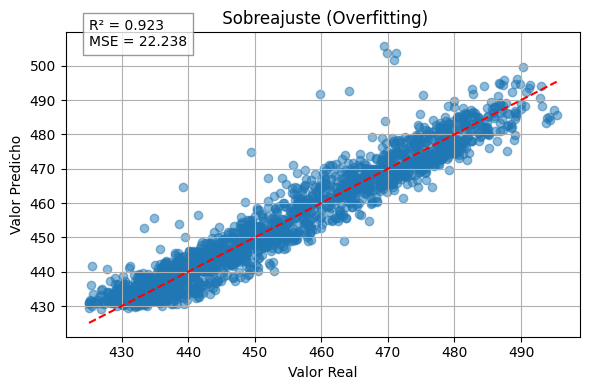

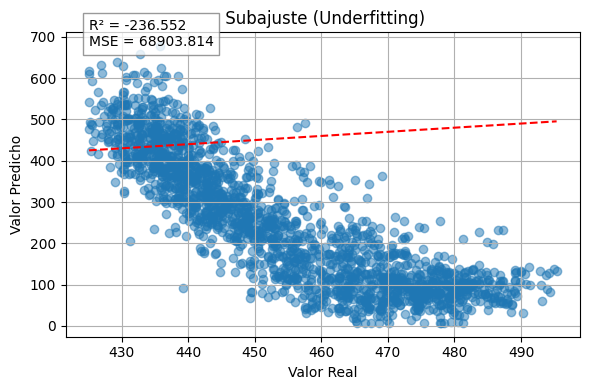

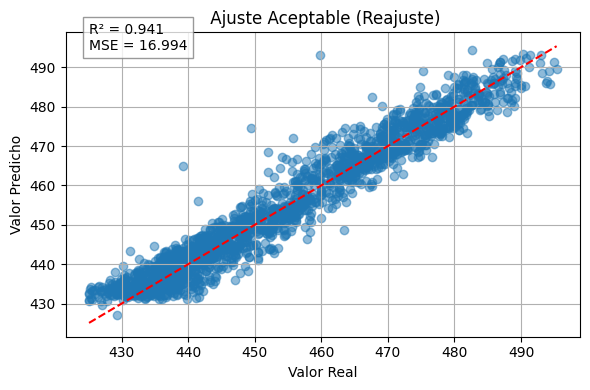

In [ ]:
plot_real_vs_pred(y_test, y_pred_sobreajuste, " Sobreajuste (Overfitting)")
plot_real_vs_pred(y_test, y_pred_subajuste, " Subajuste (Underfitting)")
plot_real_vs_pred(y_test, y_pred_reajuste, " Ajuste Aceptable (Reajuste)")



### Conclusión

A lo largo de este trabajo probé distintos modelos MLP para entender cómo se comportan según su configuración. Lo que aprendí fue que los hiperparámetros como las capas ocultas, la regularización (`alpha`) y la cantidad de iteraciones (`max_iter`) tienen un impacto muy fuerte en el resultado.

- En el **caso de sobreajuste**, el modelo era muy complejo (muchas capas y sin regularización). Aprendió demasiado bien los datos de entrenamiento, pero no funcionó tan bien con datos nuevos. Es como si hubiera "memorizado" en vez de "entender".

- En el **caso de subajuste**, el modelo era demasiado simple y no tuvo tiempo suficiente para aprender. Como resultado, no predijo bien ni en entrenamiento ni en testeo.

- En el **caso del ajuste aceptable**, se usó una configuración equilibrada, y los resultados fueron buenos tanto en entrenamiento como en testeo. Este es el comportamiento que se busca: un modelo que entienda el patrón general, sin memorizar ni quedarse corto.

En resumen, entendí que no se trata solo de entrenar un modelo, sino de encontrar el equilibrio justo para que aprenda bien y generalice mejor.
